In [41]:
import numpy as np
from utils import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
m = L96_XY()
mc = L96_X()

In [12]:
%%time 
m.warmup()

CPU times: user 428 ms, sys: 75.8 ms, total: 504 ms
Wall time: 425 ms


In [13]:
mc.init(m)

In [14]:
%%time
ref = m.run()

CPU times: user 421 ms, sys: 74.4 ms, total: 496 ms
Wall time: 451 ms


In [15]:
%%time
coarse = mc.run()

CPU times: user 160 ms, sys: 12.5 ms, total: 172 ms
Wall time: 173 ms


(25.0, 30.0)

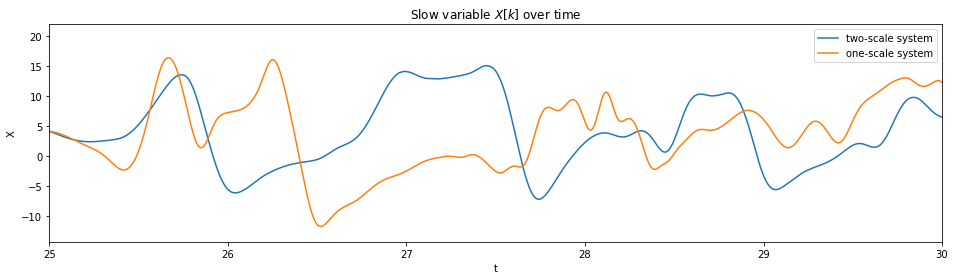

In [16]:
plt.figure(figsize=(16,4))
ref.X.isel(k=6).plot(label='two-scale system')
coarse.X.isel(k=6).plot(label='one-scale system')
plt.title('Slow variable $X[k]$ over time')
plt.legend()
plt.xlim([25, 30])

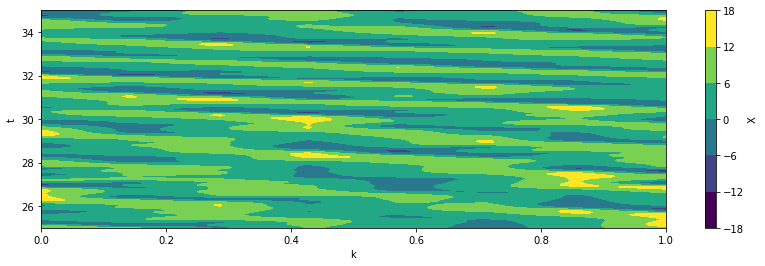

In [17]:
plt.figure(figsize=(14,4))
ref.X.isel(t=slice(2000)).plot.contourf(cmap='viridis')

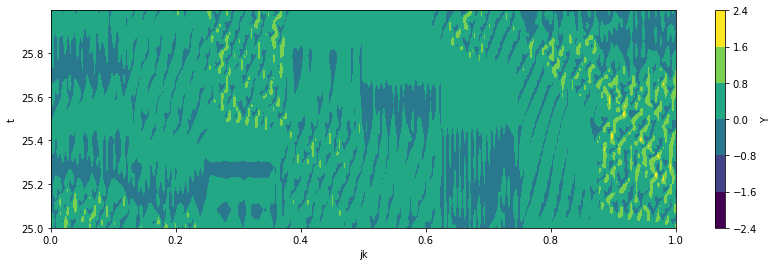

In [18]:
plt.figure(figsize=(14,4))
ref.Y.isel(t=slice(200)).plot.contourf(cmap='viridis')

Text(0.5, 1.0, 'Correlation between $X[k]$ over time: one-scale model vs two-scale model')

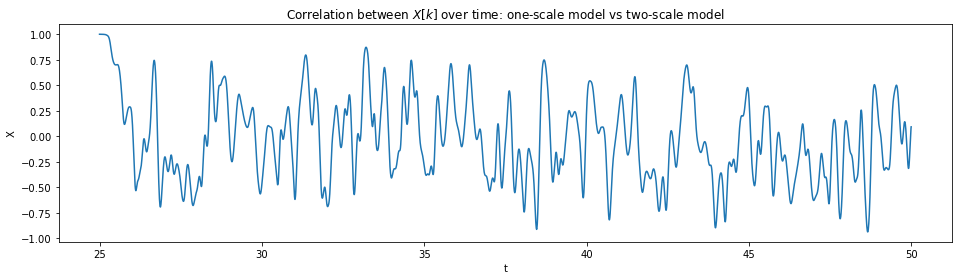

In [19]:
plt.figure(figsize=(16,4))
xr.corr(ref.X, coarse.X, dim='k').plot()
plt.title('Correlation between $X[k]$ over time: one-scale model vs two-scale model')